In [11]:
#Identifying key drivers of low retention using IBM watson dataset
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Load dataset
df= pd.read_csv('/content/sample_data/Newworkforcedataa.csv')

In [13]:
#To describe the merged dataframe df
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Shift,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,36.866348,800.557876,9.221957,2.907518,2.714797,65.470167,2.724940,2.066826,2.738663,6516.512530,14287.019690,2.662291,0.806086,11.338902,2.766110,7.033413,4.264916,2.200477,4.135442
std,9.129126,401.594438,8.158118,1.025835,1.097534,20.207572,0.714121,1.113423,1.104005,4728.456618,7138.857783,2.477704,0.855527,7.834996,0.702369,6.098991,3.627456,3.229587,3.559662
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2928.250000,7993.000000,1.000000,0.000000,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,796.500000,7.000000,3.000000,3.000000,65.500000,3.000000,2.000000,3.000000,4899.000000,14269.500000,2.000000,1.000000,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,8380.250000,20462.000000,4.000000,1.000000,15.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,3.000000,40.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
#View datatypes
df.dtypes

Attrition                  object
Age                         int64
BusinessTravel             object
DailyRate                   int64
Department                 object
DistanceFromHome            int64
Education                   int64
EnvironmentSatisfaction     int64
Gender                     object
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                   object
Shift                       int64
TotalWorkingYears           int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

**Replacing categorical variables with zeros, one and two**

In [15]:
#After these two lines of code, the 'Attrition' column will have been transformed from containing textual values ('Yes' and 'No') to containing numerical values (1 and 0), making it easier to work with in numerical operations and modeling tasks
# Replace all occurrences of 'Yes' with 1 in the 'Attrition' column
df['Attrition'] = df['Attrition'].replace('Yes', 1)

# Replace all occurrences of 'Yes' with 0 in the 'Attrition' column
df['Attrition'] = df['Attrition'].replace('No', 0)

In [16]:
#This line replaces all occurrences of the string 'Male' and 'Female' in the 'Gender' column with the numerical value 1 and 2. This coding scheme assigns the value 1 to males and 2 to female
df['Gender'] = df['Gender'].replace('Male', 1)
df['Gender'] = df['Gender'].replace('Female', 2)
df['OverTime'] = df['OverTime'].replace('Yes', 1)
df['OverTime'] = df['OverTime'].replace('No', 0)

In [17]:
df['MaritalStatus'] = df['MaritalStatus'].replace('Single', 1)
df['MaritalStatus'] = df['MaritalStatus'].replace('Divorced', 0)
df['MaritalStatus'] = df['MaritalStatus'].replace('Married', 2)

**Applying one-hot encoding to specified cateorical columns** using pd.get_dummies(). It takes the original DataFrame df as an input and the list of columns to encode (columns_to_encode). The drop_first parameter is set to False, which means that for each categorical value in the specified columns, new binary columns will be created for each category. This creates a new DataFrame encoded_data with the one-hot encoded columns added



In [18]:
# Columns to be one-hot encoded
columns_to_encode = ['BusinessTravel', 'JobRole', 'Department']

# Using One-Hot Encoding for specified columns
encoded_data = pd.get_dummies(df, columns=columns_to_encode, drop_first=False)
df2 = encoded_data

In [19]:
#check datatypes for the changes
df2.dtypes

Attrition                           int64
Age                                 int64
DailyRate                           int64
DistanceFromHome                    int64
Education                           int64
EnvironmentSatisfaction             int64
Gender                              int64
HourlyRate                          int64
JobInvolvement                      int64
JobLevel                            int64
JobSatisfaction                     int64
MaritalStatus                       int64
MonthlyIncome                       int64
MonthlyRate                         int64
NumCompaniesWorked                  int64
OverTime                            int64
Shift                               int64
TotalWorkingYears                   int64
WorkLifeBalance                     int64
YearsAtCompany                      int64
YearsInCurrentRole                  int64
YearsSinceLastPromotion             int64
YearsWithCurrManager                int64
BusinessTravel_Non-Travel         

In [20]:
#Save data to file
df2.to_csv(r'C:\Users\9480m\Documents\Coursework2\Homeworkdata.csv', index=False)

**The heatmap visualizes the correlation between different numerical variables in the DataFrame df2**

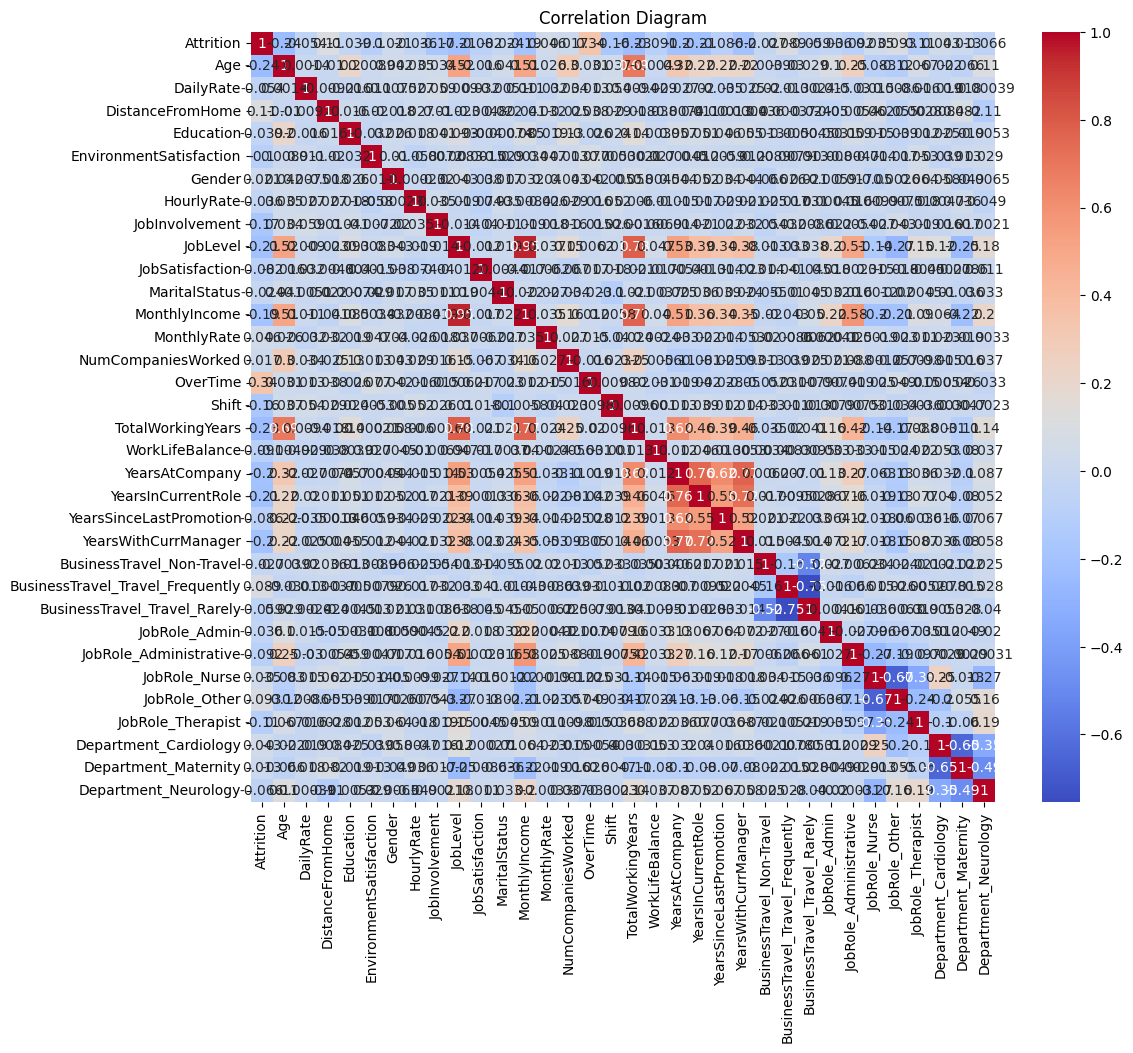

In [21]:
#Correlation diagram
corr_matrix = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Diagram')
plt.show()

In [22]:
#Data standardization: This process scales and centers the data so that each feature has a mean of 0 and a standard deviation of 1. This ensure that all features contribute equally and prevent features with larger scales from dominating the learning process.
scaler=StandardScaler()
x=scaler.fit_transform(df2)

Separating the target variable from the features in a DataFrame (df2). All dependent variables are stored in x and independent variale is stored in y

In [23]:
# Separate the target variable from the features
X = df2.drop('Attrition', axis=1)
y = df2['Attrition']

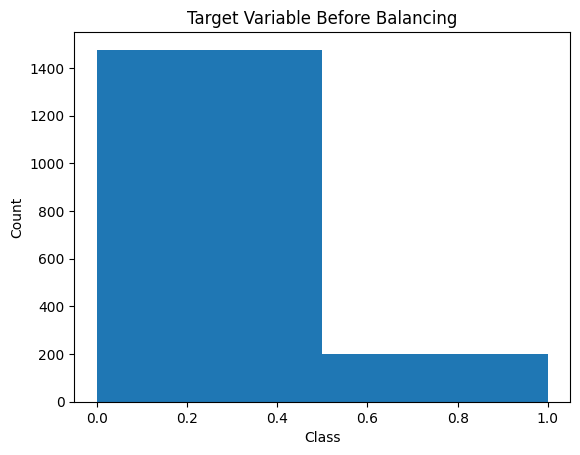

In [24]:
 #ploting the distribution of the target variable 'Attrition' before any balancing has been applied
# plot the target variable before balancing
plt.hist(y, bins=2)
plt.title('Target Variable Before Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [25]:
# splitting dataset into training and testing sets using the train_test_split. This parameter specifies that 30% of the data will be used for testing, while 70% will be used for training. We can adjust this percentage by changing the value.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build(fit) a logistic regression model using the training data
# This line trains the logistic regression model on the training data: X_train: This is the feature dataset for training, y_train: This is the target variable for training.
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [26]:
# Evaluate the model using the testing data
#make predictions using the trained lr model and calculate the accuracy of the model on the test dataset.
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.8628230616302187


In [27]:
#create and display a confusion matrix for evaluating the performance of your classification model (lr) on the test dataset

cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'],
                     columns = ['No','Yes'])
print(df_cm)

    No  Yes
0  425    4
1   65    9


**From the classification report**, LR model performs well in terms of precision, recall, and F1-Score for Class 0 (the negative class), but it performs poorly for Class 1 (the positive class) due to low recall. But since the goal is to correctly identify Class 1 (low retention) instances is critical, i need to work on improving recall for that class.

In [28]:
#computes evaluation metrics like precision, recall, and F1-score to gain a more detailed understanding of the model's performance on different aspects of classification.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92       429
           1       0.69      0.12      0.21        74

    accuracy                           0.86       503
   macro avg       0.78      0.56      0.57       503
weighted avg       0.84      0.86      0.82       503



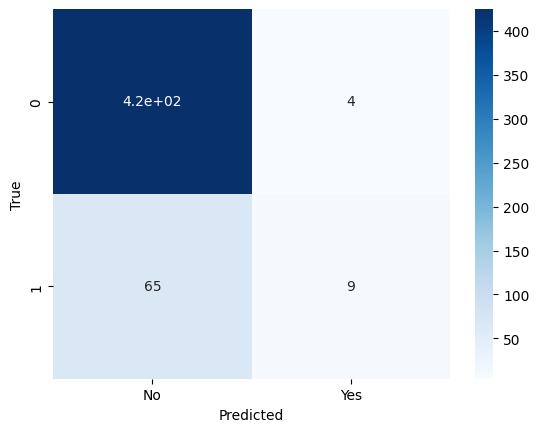

In [30]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**ROC curve:** ROC curve is a also valuable tool for evaluating the performance of binary classification models.

AUC-ROC score: 0.7499054999054999


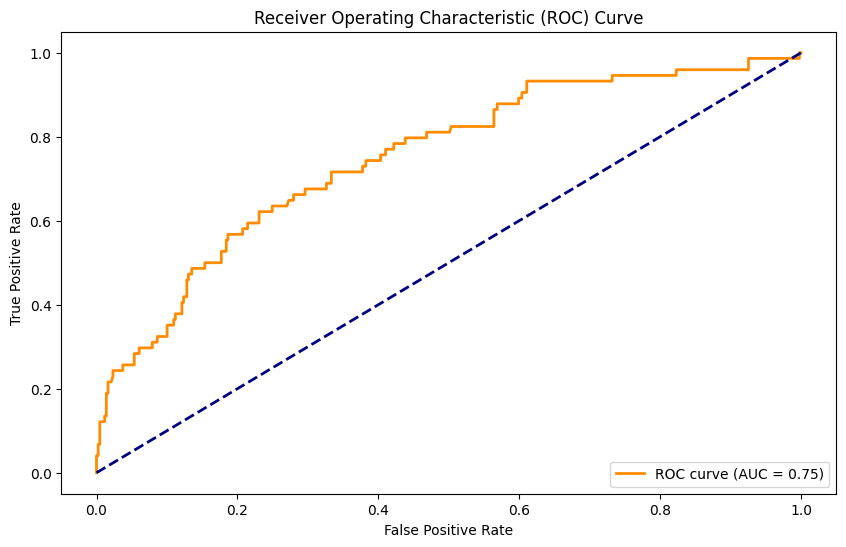

In [31]:

# Predict probabilities for the testing set
y_prob = lr.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Addressing class imbalance using **SMOTE ENN**(a combination of two resampling methods): this will help to improve the recall of class 1. The 'Counter' objects before and after resampling is used to verify the effectiveness of the resampling process in addressing class imbalance.

In [32]:
#Data Balancing using a combination of two resampling methods SMOTE and ENN
from imblearn.combine import SMOTEENN
from collections import Counter
counter = Counter(y_train)
print('Before',counter)
# assuming X_train and y_train are your input features and labels, respectively
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
counter = Counter(y_resampled)
print('After',counter)

Before Counter({0: 1048, 1: 125})
After Counter({1: 792, 0: 633})


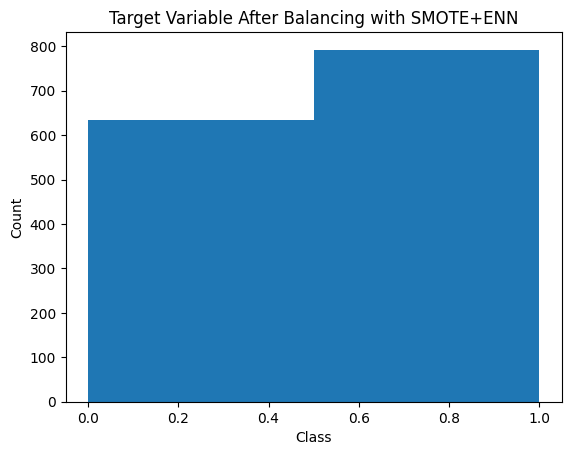

In [33]:
#visualing the resampled data
plt.hist(y_resampled, bins=2)
plt.title('Target Variable After Balancing with SMOTE+ENN')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**Repeat the modelling process after balancing**

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)

# Build a logistic regression model using the training data
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Evaluate the model using the testing data
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.7757009345794392


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'],
                     columns = ['No','Yes'])
print(df_cm)

    No  Yes
0  131   64
1   32  201


**Class 1 (low retention) has a higher recall, which suggests that the model is better at capturing cases of low retention after resampling.**

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       195
           1       0.76      0.86      0.81       233

    accuracy                           0.78       428
   macro avg       0.78      0.77      0.77       428
weighted avg       0.78      0.78      0.77       428



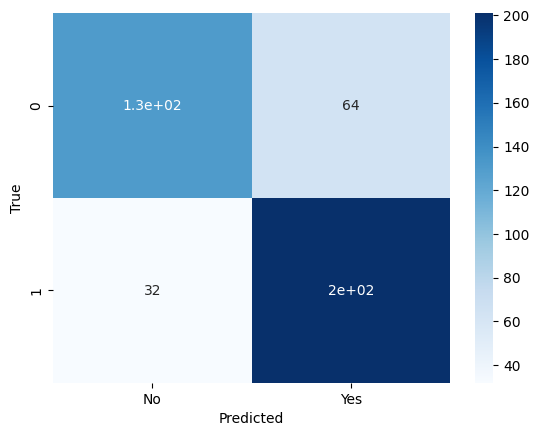

In [37]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC-ROC score: 0.8574006822933862


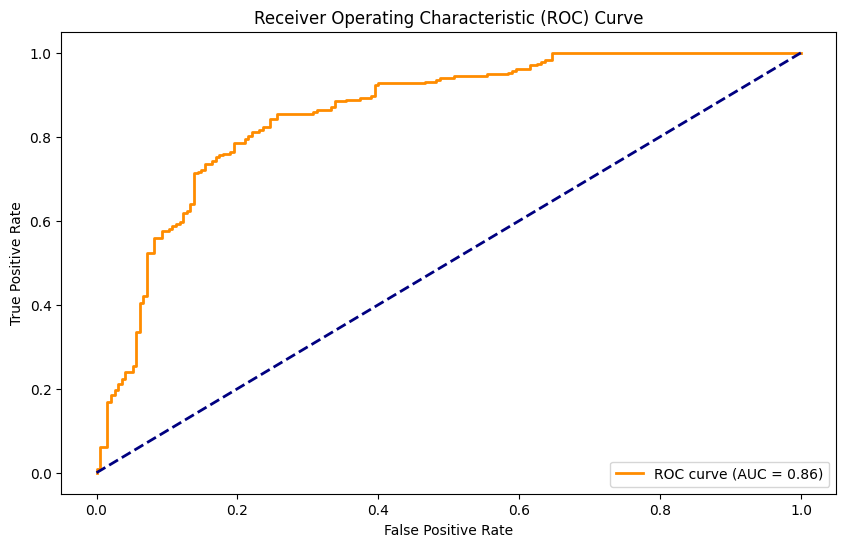

In [38]:
# Predict probabilities for the testing set
y_prob = lr.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Random Forest before balancing**

In [45]:
# Separate the target variable from the features
X = df2.drop('Attrition', axis=1)
y = df2['Attrition']

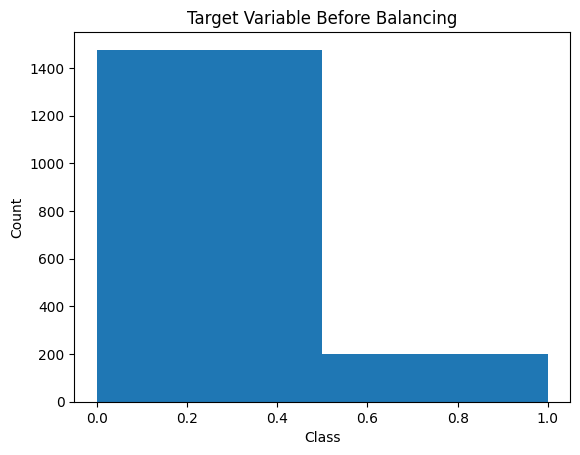

In [46]:
# plot the target variable before balancing
plt.hist(y, bins=2)
plt.title('Target Variable Before Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Create a Random Forest classifier
rfc = RandomForestClassifier()

In [49]:
#Build the Model after data balancing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict the target values using the testing data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model using the testing data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.9672897196261683


In [ ]:
# Train the classifier on the features and target variable
rfc.fit(X, y)

RandomForestClassifier()

In [50]:
#Build the model
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 70% training and 30% test
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict the target values using the testing data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model using the testing data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.8878281622911695


In [51]:
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'],
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0      354     3
1       44    18


In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       357
           1       0.86      0.29      0.43        62

    accuracy                           0.89       419
   macro avg       0.87      0.64      0.69       419
weighted avg       0.88      0.89      0.86       419



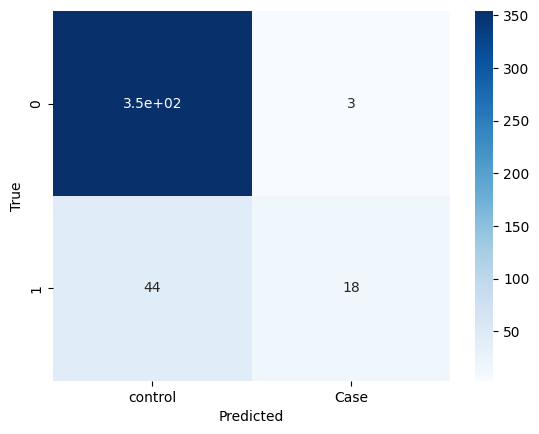

In [53]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC-ROC score: 0.8910047890123791


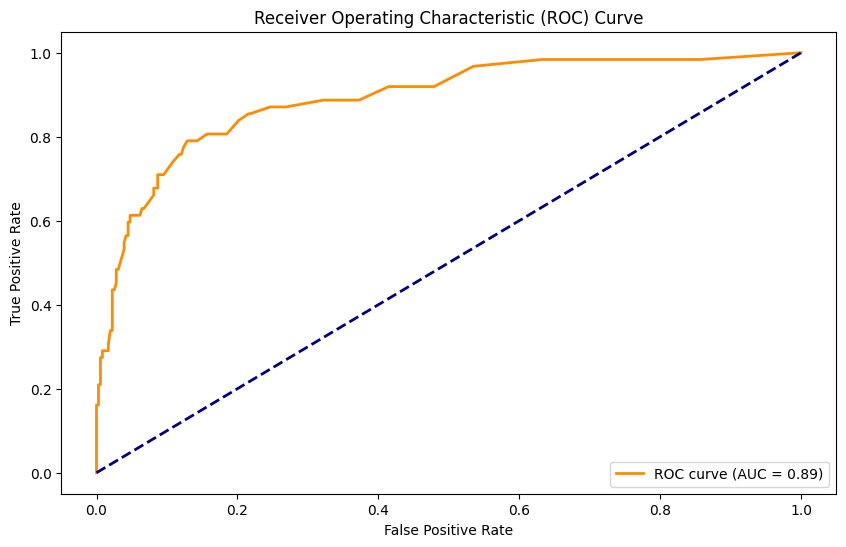

In [54]:
# Predict probabilities for the testing set
y_prob = rf.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Random Forest Model ** - After Balancing

In [55]:
#Data Balancing
from imblearn.combine import SMOTEENN
from collections import Counter
counter = Counter(y_train)
print('Before',counter)
# assuming X_train and y_train are your input features and labels, respectively
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
counter = Counter(y_resampled)
print('After',counter)

Before Counter({0: 1120, 1: 137})
After Counter({1: 851, 0: 692})


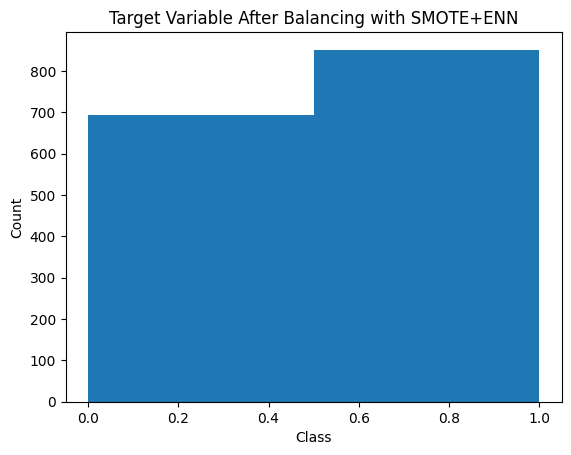

In [56]:
plt.hist(y_resampled, bins=2)
plt.title('Target Variable After Balancing with SMOTE+ENN')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [57]:
#Build the Model after data balancing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict the target values using the testing data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model using the testing data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.9654427645788337


In [58]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'],
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0      199    11
1        5   248


In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       210
           1       0.96      0.98      0.97       253

    accuracy                           0.97       463
   macro avg       0.97      0.96      0.97       463
weighted avg       0.97      0.97      0.97       463



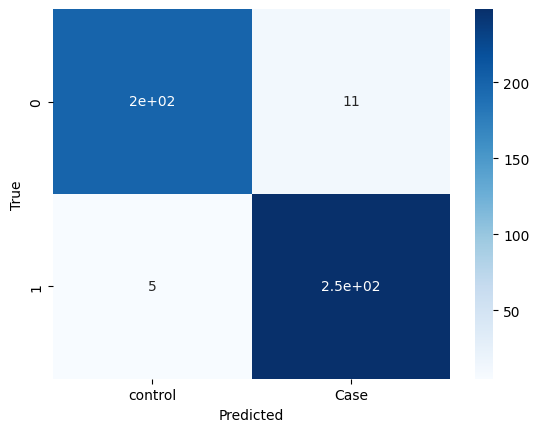

In [60]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC-ROC score: 0.9950686994165255


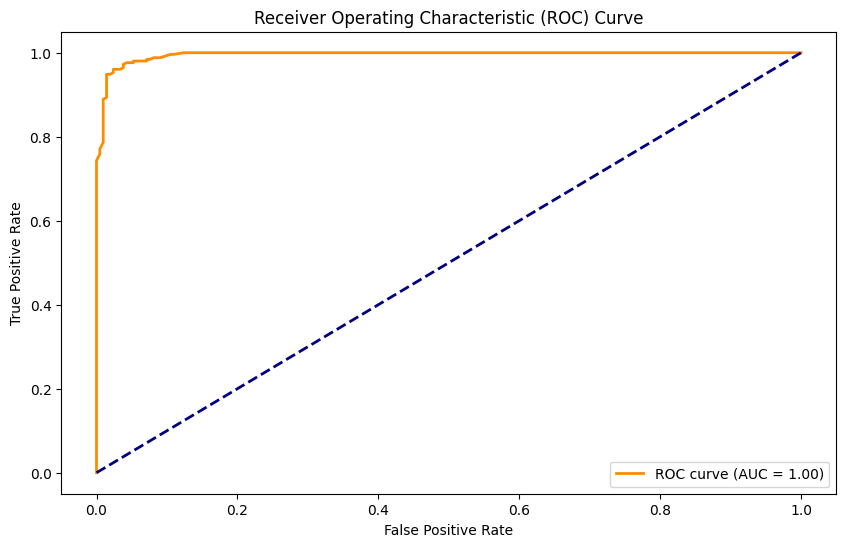

In [61]:
# Predict probabilities for the testing set
y_prob = rf.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [63]:
# Train the classifier on the features and target variable
rfc.fit(X, y)

RandomForestClassifier()

In [64]:
# Get the feature importances using the RF feature selection Process
importances = rfc.feature_importances_

# Create a DataFrame of feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by feature importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top 14 most important features
print(feature_importances.head(14))

                    feature  importance
14                 OverTime    0.109697
11            MonthlyIncome    0.087347
0                       Age    0.087149
16        TotalWorkingYears    0.063399
2          DistanceFromHome    0.054605
12              MonthlyRate    0.050385
18           YearsAtCompany    0.048661
1                 DailyRate    0.047254
6                HourlyRate    0.045342
15                    Shift    0.033874
7            JobInvolvement    0.033159
13       NumCompaniesWorked    0.031830
17          WorkLifeBalance    0.029738
4   EnvironmentSatisfaction    0.029204


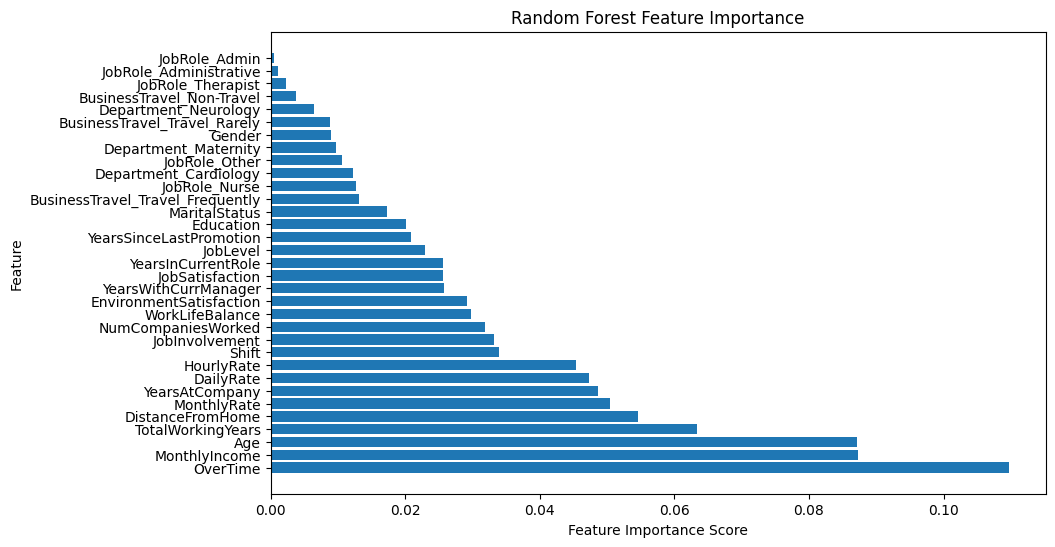

In [65]:
import matplotlib.pyplot as plt

# Assuming you have trained the Random Forest model and saved it as 'rf_model'
# rf_model = RandomForestClassifier(...)
rf_feature_importance = rfc.feature_importances_

# Create a DataFrame to store feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': (X.columns), 'Importance': rf_feature_importance})

# Sort the features by importance score in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

**Decision Tree Classifier**- Before balancing

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
# Separate the target variable from the features
X = df2.drop('Attrition', axis=1)
y = df2['Attrition']

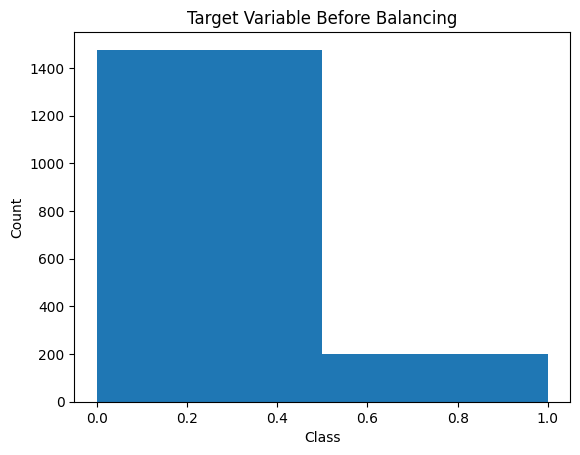

In [68]:
# plot the target variable before balancing
plt.hist(y, bins=2)
plt.title('Target Variable Before Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [69]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 70% training and 30% test

In [70]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [71]:
# Train the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [72]:
#Predict the target values using the testing data
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the model using the testing data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.8591885441527446


In [73]:

cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'],
                     columns = ['control','Case'])
print(df_cm)


   control  Case
0      336    21
1       38    24


In [74]:
#precision, F1, recall
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       357
           1       0.53      0.39      0.45        62

    accuracy                           0.86       419
   macro avg       0.72      0.66      0.68       419
weighted avg       0.84      0.86      0.85       419



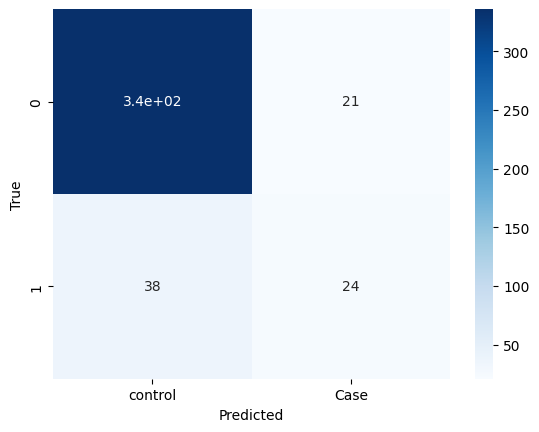

In [75]:
#heatmap
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC-ROC score: 0.6641366223908919


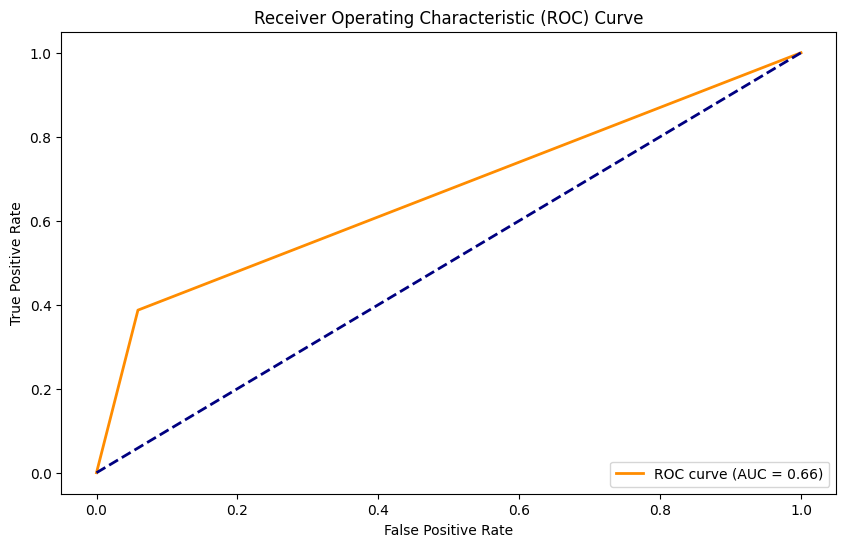

In [76]:
# Predict probabilities for the testing set
y_prob = dt_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Decision Tree** after balancing

In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
#Data Balancing
from imblearn.combine import SMOTEENN
from collections import Counter
counter = Counter(y_train)
print('Before',counter)
# assuming X_train and y_train are your input features and labels, respectively
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
counter = Counter(y_resampled)
print('After',counter)

Before Counter({0: 1120, 1: 137})
After Counter({1: 851, 0: 692})


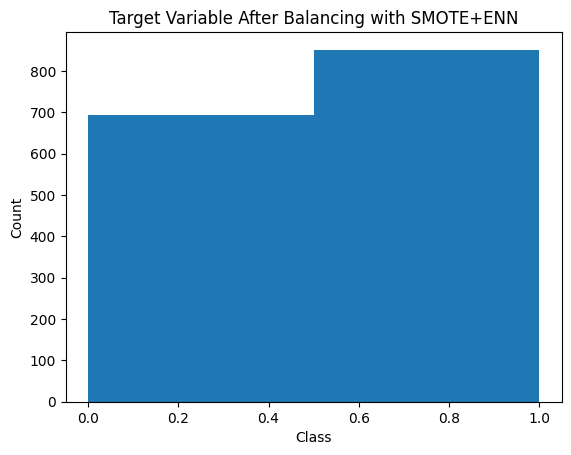

In [79]:
plt.hist(y_resampled, bins=2)
plt.title('Target Variable After Balancing with SMOTE+ENN')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [80]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)

In [81]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [82]:
# Train the model on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [83]:
#Predict the target values using the testing data
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the model using the testing data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.9114470842332614


In [84]:
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'],
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0      179    31
1       10   243


In [85]:
#precision, F1, recall
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90       210
           1       0.89      0.96      0.92       253

    accuracy                           0.91       463
   macro avg       0.92      0.91      0.91       463
weighted avg       0.91      0.91      0.91       463



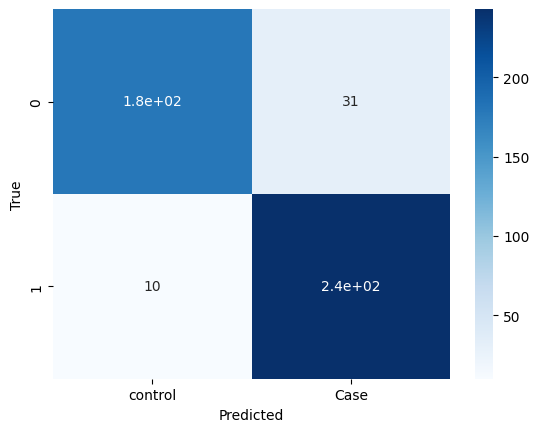

In [86]:
#heatmap
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC-ROC score: 0.9064276303406738


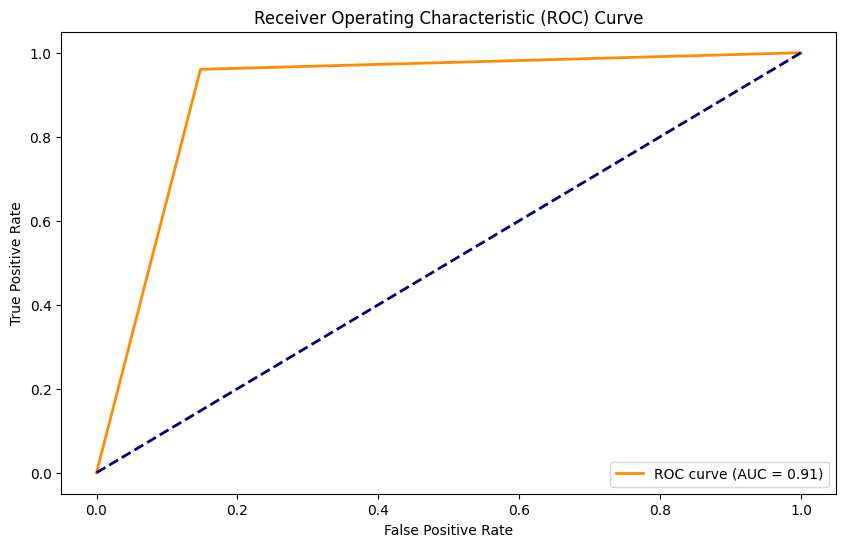

In [87]:
y_prob = dt_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [88]:
# Get the feature importances from the Decision Tree model
importances_dt = dt_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_dt = pd.DataFrame({'Feature': X.columns, 'Importance': importances_dt})

# Sort the features by importance in descending order
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)

# Print the top features contributing to low retention
print("Decision Tree - Top Features:")
print(feature_importance_dt.head(10))

Decision Tree - Top Features:
                    Feature  Importance
11            MonthlyIncome    0.416432
16        TotalWorkingYears    0.089712
4   EnvironmentSatisfaction    0.061383
10            MaritalStatus    0.056988
14                 OverTime    0.041256
9           JobSatisfaction    0.037489
17          WorkLifeBalance    0.032444
7            JobInvolvement    0.031339
20  YearsSinceLastPromotion    0.029917
6                HourlyRate    0.027476


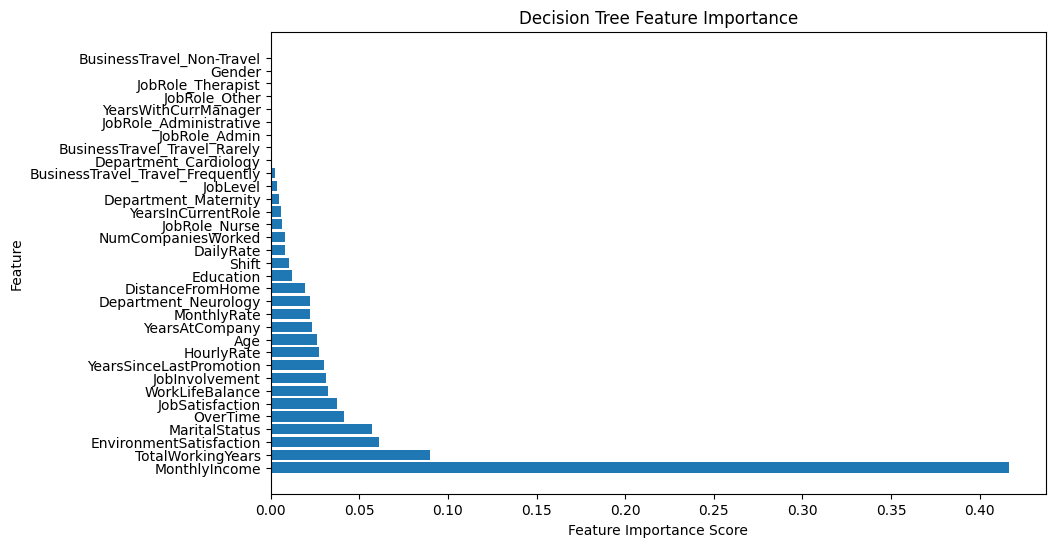

In [89]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_dt['Feature'], feature_importance_dt['Importance'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()

**Extreme Gradient Boost - Before balancing**

In [90]:
import xgboost as xgb

In [91]:
# Separate the target variable from the features
X = df2.drop('Attrition', axis=1)
y = df2['Attrition']

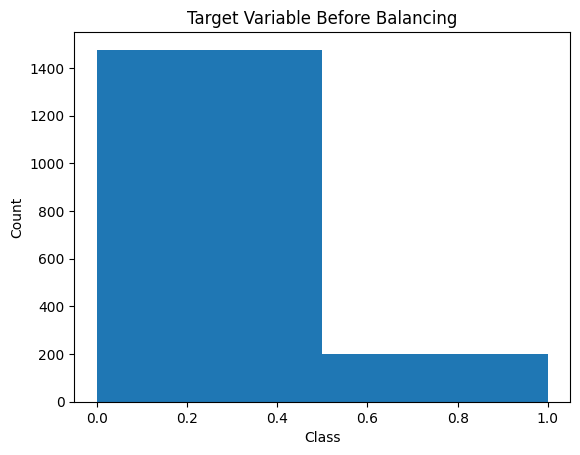

In [92]:
# plot the target variable before balancing
plt.hist(y, bins=2)
plt.title('Target Variable Before Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [93]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) # 70% training and 30% test

In [94]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

In [95]:
# Train the model on the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [96]:
#Predict the target values using the testing data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the accuracy of the model using the testing data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.9069212410501193


In [97]:
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'],
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0      348     9
1       30    32


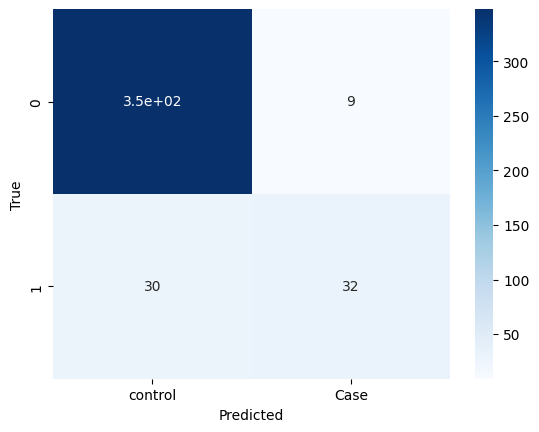

In [98]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [99]:
#precision, F1, recall
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       357
           1       0.78      0.52      0.62        62

    accuracy                           0.91       419
   macro avg       0.85      0.75      0.78       419
weighted avg       0.90      0.91      0.90       419



AUC-ROC score: 0.911222553537544


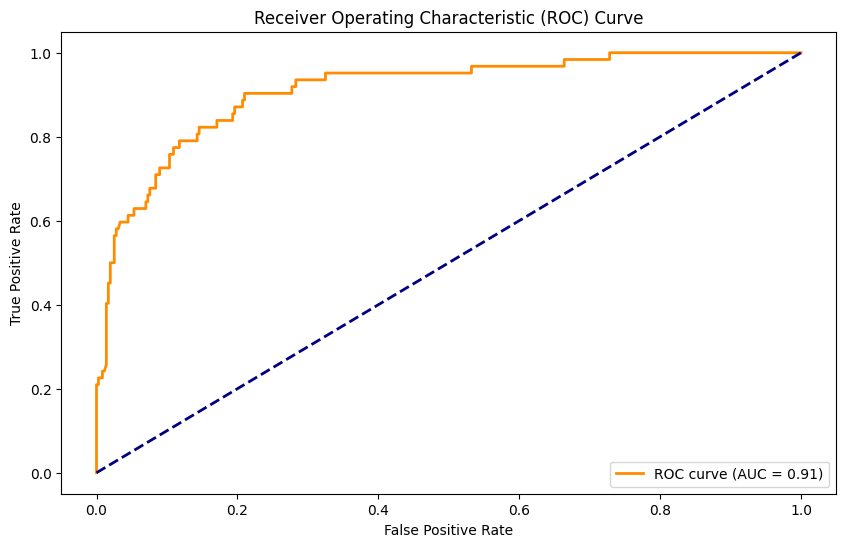

In [100]:
# Predict probabilities for the testing set
y_prob = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Extreme Gradient Boost - After Balancing**

In [101]:
#Data Balancing
from imblearn.combine import SMOTEENN
from collections import Counter
counter = Counter(y_train)
print('Before',counter)
# assuming X_train and y_train are your input features and labels, respectively
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
counter = Counter(y_resampled)
print('After',counter)

Before Counter({0: 1120, 1: 137})
After Counter({1: 851, 0: 692})


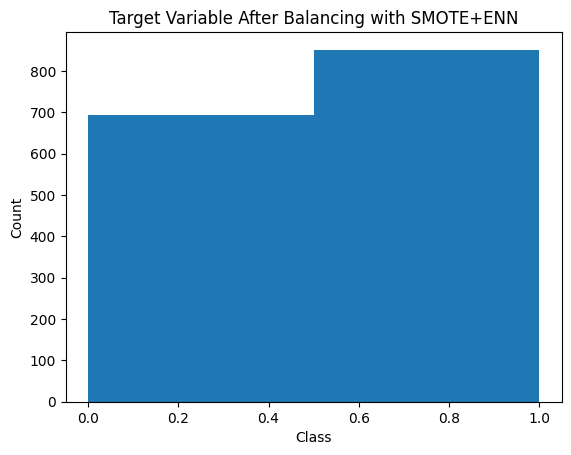

In [102]:
plt.hist(y_resampled, bins=2)
plt.title('Target Variable After Balancing with SMOTE+ENN')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [103]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)

In [104]:
# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

In [105]:
# Train the model on the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [106]:
#Predict the target values using the testing data
y_pred = xgb_classifier.predict(X_test)

# Evaluate the accuracy of the model using the testing data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy}")

Accuracy of the model: 0.9719222462203023


In [107]:
cm=confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=['0','1'],
                     columns = ['control','Case'])
print(df_cm)

   control  Case
0      200    10
1        3   250


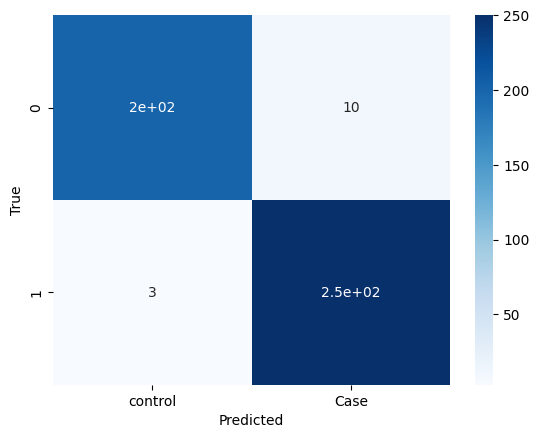

In [108]:
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [109]:
#precision, F1, recall
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       210
           1       0.96      0.99      0.97       253

    accuracy                           0.97       463
   macro avg       0.97      0.97      0.97       463
weighted avg       0.97      0.97      0.97       463



AUC-ROC score: 0.9962356484095615


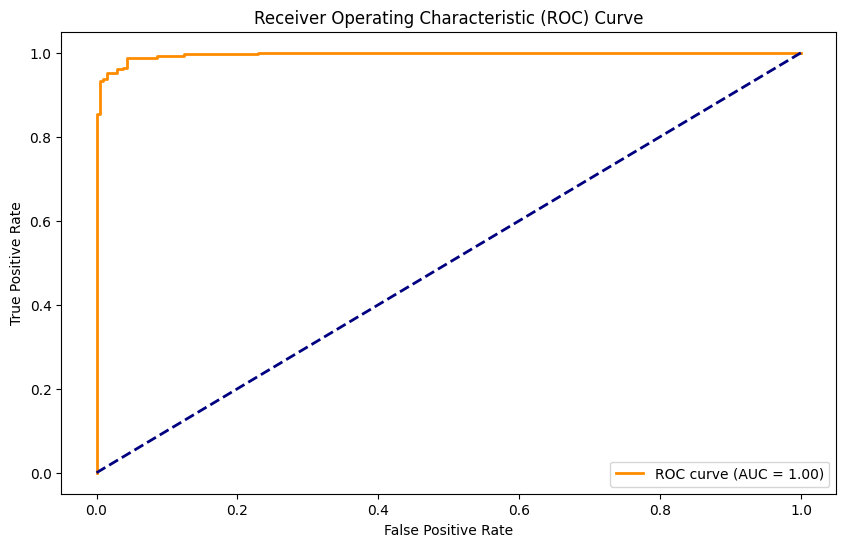

In [110]:
# Predict probabilities for the testing set
y_prob = xgb_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_roc = auc(fpr, tpr)
print("AUC-ROC score:", auc_roc)
# Plot ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [111]:
# Get the feature importances from the XGBoost model
importances_xgb = xgb_classifier.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': importances_xgb})

# Sort the features by importance in descending order
feature_importance_xgb = feature_importance_xgb.sort_values(by='Importance', ascending=False)

# Print the top features contributing to low retention
print("XGBoost - Top Features:")
print(feature_importance_xgb.head(10))

XGBoost - Top Features:
                      Feature  Importance
11              MonthlyIncome    0.214790
16          TotalWorkingYears    0.067744
17            WorkLifeBalance    0.049172
15                      Shift    0.047342
4     EnvironmentSatisfaction    0.047136
7              JobInvolvement    0.045646
22  BusinessTravel_Non-Travel    0.043362
14                   OverTime    0.042773
18             YearsAtCompany    0.041791
32       Department_Neurology    0.040592


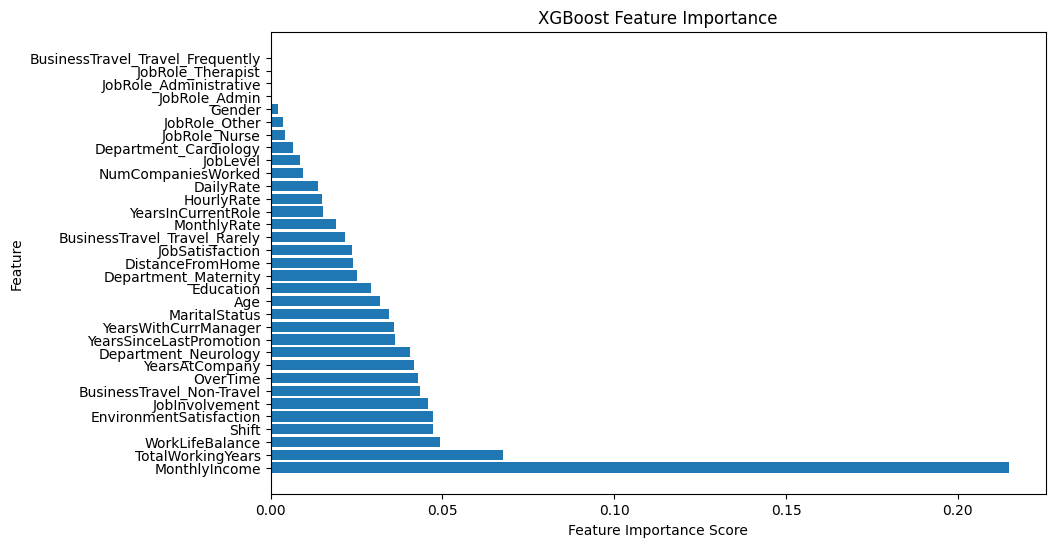

In [112]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_xgb['Feature'], feature_importance_xgb['Importance'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()

**Neural Networks - Before Balancing**

In [113]:
!pip install tensorflow

In [114]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [115]:
# Separate features and target
X = df2.drop(columns=['Attrition'])
y = df2['Attrition']



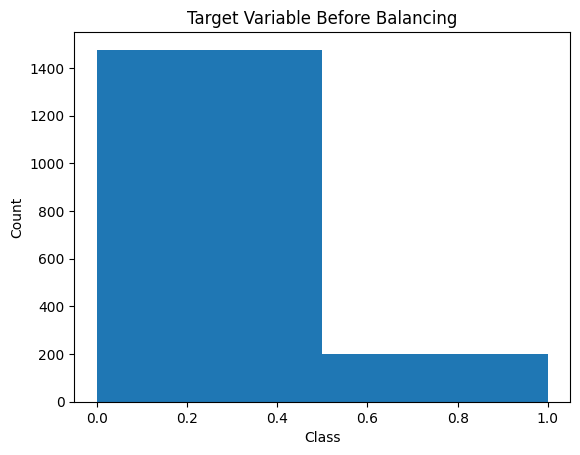

In [116]:
# plot the target variable before balancing
plt.hist(y, bins=2)
plt.title('Target Variable Before Balancing')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [117]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [118]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
37/37 [==============================] - 2s 3ms/step - loss: 0.3213 - accuracy: 0.8926
Epoch 2/10
37/37 [==============================] - 0s 3ms/step - loss: 0.2439 - accuracy: 0.8994
Epoch 3/10
37/37 [==============================] - 0s 3ms/step - loss: 0.1997 - accuracy: 0.9190
Epoch 4/10
37/37 [==============================] - 0s 4ms/step - loss: 0.1702 - accuracy: 0.9403
Epoch 5/10
37/37 [==============================] - 0s 3ms/step - loss: 0.1507 - accuracy: 0.9471
Epoch 6/10
37/37 [==============================] - 0s 4ms/step - loss: 0.1373 - accuracy: 0.9514
Epoch 7/10
37/37 [==============================] - 0s 3ms/step - loss: 0.1264 - accuracy: 0.9540
Epoch 8/10
37/37 [==============================] - 0s 3ms/step - loss: 0.1168 - accuracy: 0.9557
Epoch 9/10
37/37 [==============================] - 0s 3ms/step - loss: 0.1068 - accuracy: 0.9616
Epoch 10/10
37/37 [==============================] - 0s 3ms/step - loss: 0.1009 - accuracy: 0.9608


In [119]:
# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = np.round(y_pred_proba)  # Convert probabilities to binary predictions

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

16/16 [==============================] - 0s 2ms/step
Accuracy: 0.9145129224652088
Precision: 0.7818181818181819
Recall: 0.581081081081081
F1-Score: 0.6666666666666666
AUC-ROC: 0.9103036603036604


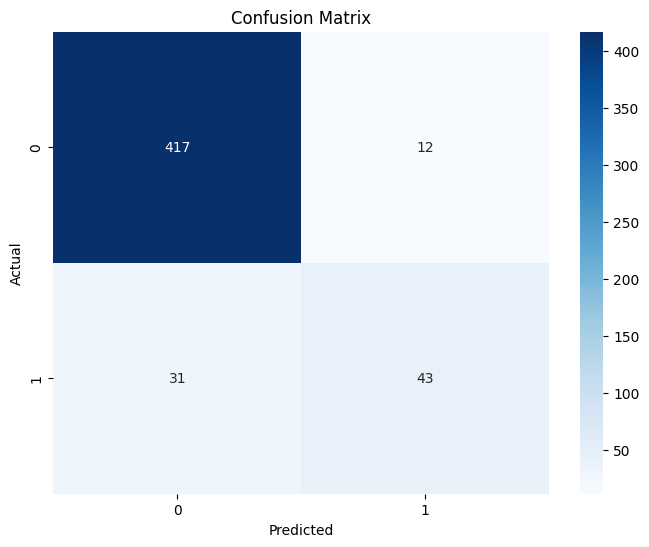

In [120]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

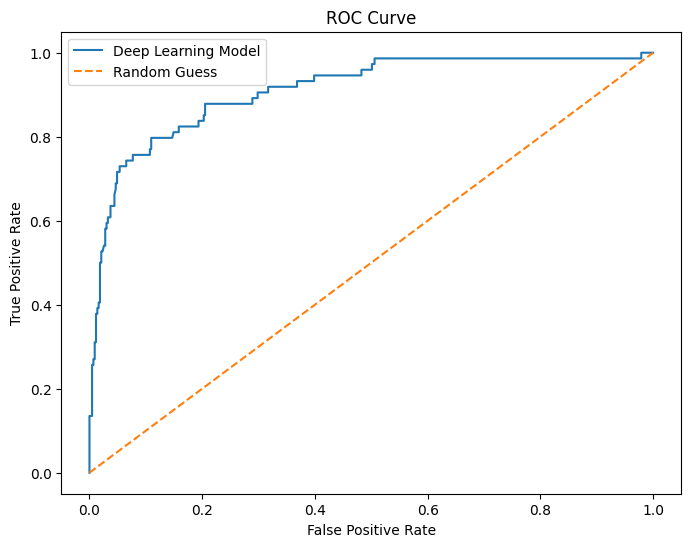

In [121]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Deep Learning Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.9 MB/s eta 0:00:00


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


Permutation explainer: 504it [00:37, 10.63it/s]                         
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


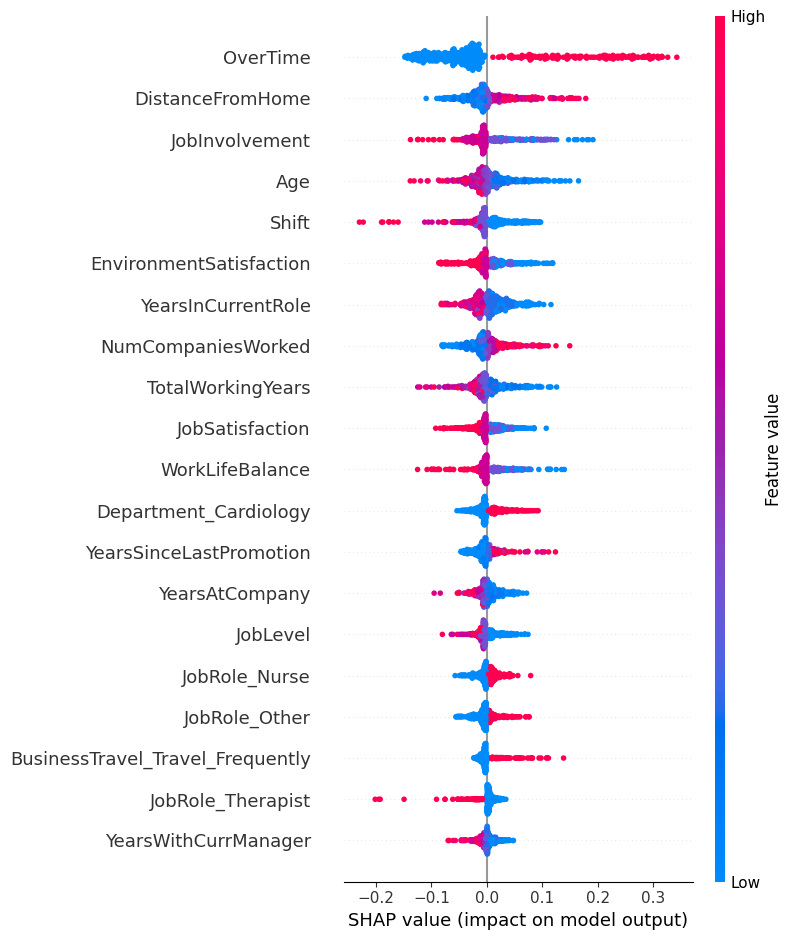

In [122]:
!pip install shap
import shap
shap.initjs()

explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)

**Neural Networks after balancing**

In [123]:
#Data Balancing
from imblearn.combine import SMOTEENN
from collections import Counter
counter = Counter(y_train)
print('Before',counter)
# assuming X_train and y_train are your input features and labels, respectively
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
counter = Counter(y_resampled)
print('After',counter)

Before Counter({0: 1048, 1: 125})
After Counter({1: 792, 0: 633})


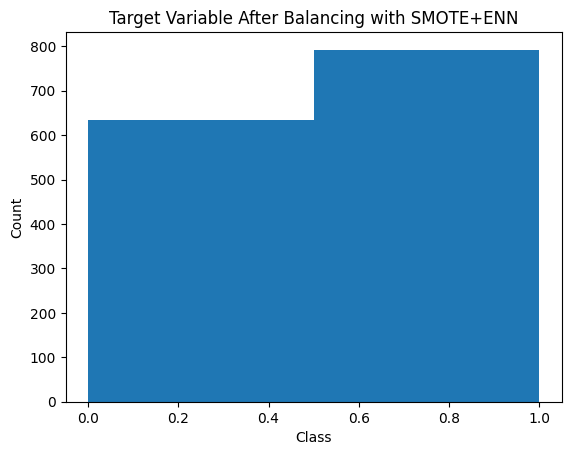

In [124]:
plt.hist(y_resampled, bins=2)
plt.title('Target Variable After Balancing with SMOTE+ENN')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [125]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [126]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)


Epoch 1/10
32/32 [==============================] - 1s 2ms/step - loss: 0.5115 - accuracy: 0.7723
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.9178
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1577 - accuracy: 0.9368
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.1195 - accuracy: 0.9569
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0957 - accuracy: 0.9719
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.0798 - accuracy: 0.9729
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0675 - accuracy: 0.9769
Epoch 8/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0580 - accuracy: 0.9860
Epoch 9/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9860
Epoch 10/10
32/32 [==============================] - 0s 4ms/step - loss: 0.0436 - accuracy: 0.9910


In [127]:
# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = np.round(y_pred_proba)  # Convert probabilities to binary predictions

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", roc_auc)

14/14 [==============================] - 0s 3ms/step
Accuracy: 0.9602803738317757
Precision: 0.9537815126050421
Recall: 0.9742489270386266
F1-Score: 0.9639065817409767
AUC-ROC: 0.9893254099262683


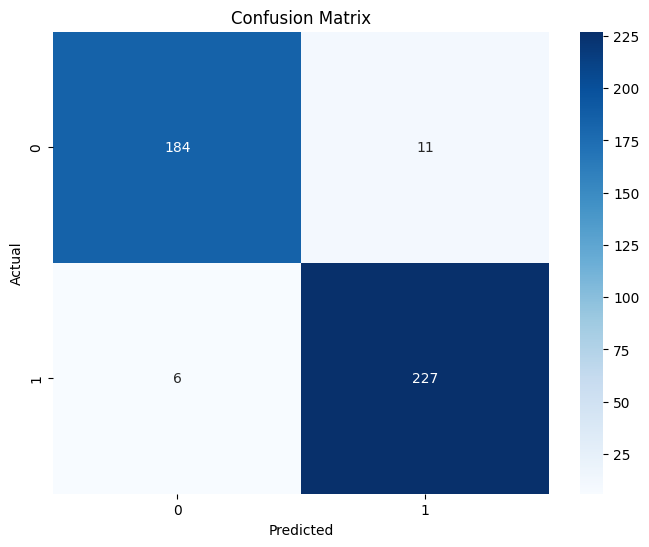

In [128]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

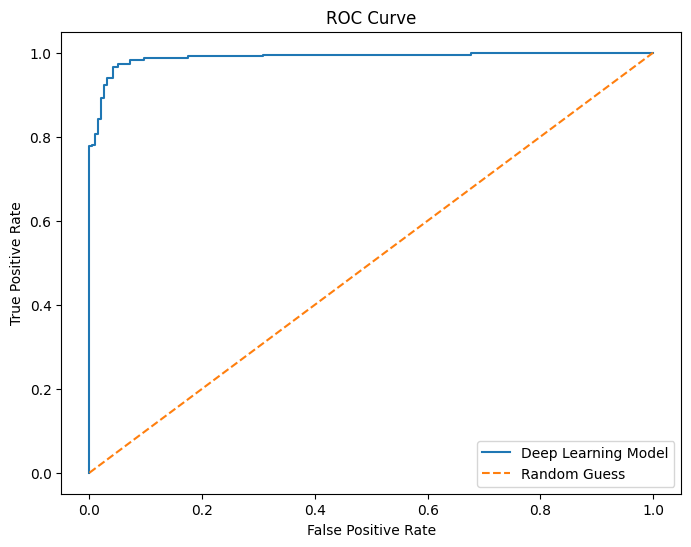

In [129]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Deep Learning Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Permutation explainer: 429it [00:28,  9.44it/s]                         
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


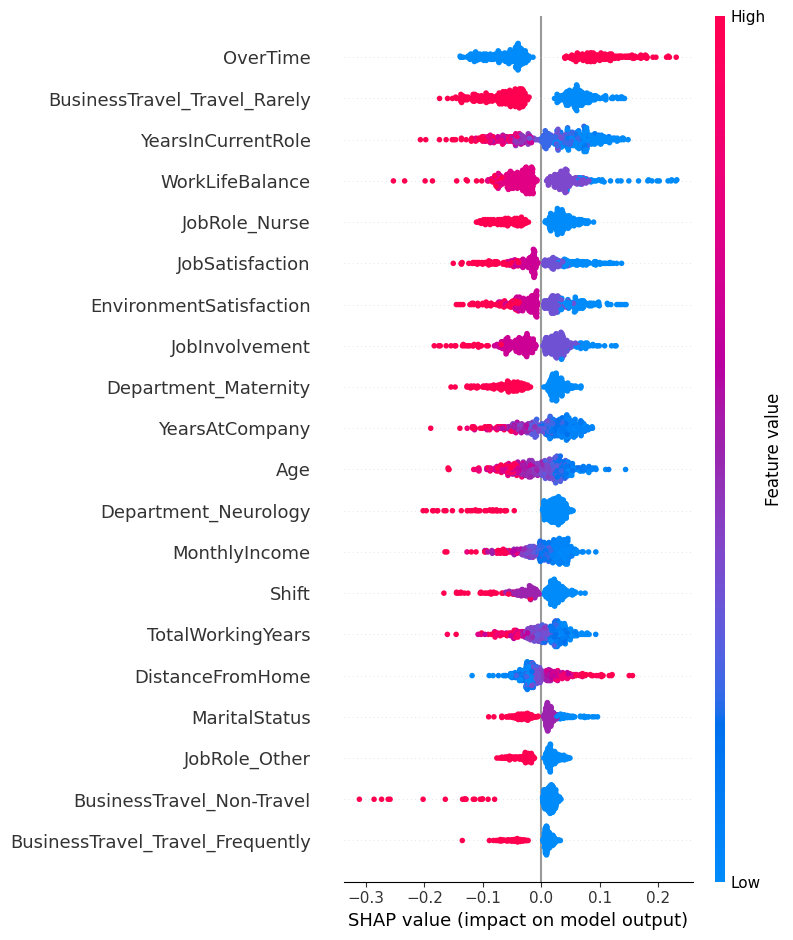

In [130]:
!pip install shap
import shap
shap.initjs()

explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)